In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## Read dataset

In [2]:
accidents=pd.read_csv("accidents_final.csv",index_col='Accident_Index')
casualties=pd.read_csv("casualties_final.csv",index_col='Accident_Index')
vehicles=pd.read_csv("vehicles_final.csv",index_col='Accident_Index')

## Preprocessing

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780653 entries, 200501BS00001 to 2015984141415
Data columns (total 28 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 int64  
 3   Accident_Severity                            object 
 4   Number_of_Vehicles                           int64  
 5   Number_of_Casualties                         int64  
 6   Date                                         object 
 7   Day_of_Week                                  object 
 8   Time                                         object 
 9   Local_Authority_(District)                   int64  
 10  Local_Authority_(Highway)                    object 
 11  1st_Road_Class                               int64  
 12  1st_Road_Number                              int64  
 13 

In [4]:
accidents["Accident_Severity"].value_counts()

unserious            1515575
serious               242080
extremely serious      22998
Name: Accident_Severity, dtype: int64

In [5]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216720 entries, 200501BS00001 to 2014984139614
Data columns (total 12 columns):
 #   Column                              Dtype 
---  ------                              ----- 
 0   Unnamed: 0                          int64 
 1   Vehicle_Reference                   int64 
 2   Casualty_Reference                  int64 
 3   Casualty_Class                      object
 4   Sex_of_Casualty                     object
 5   Age_of_Casualty                     int64 
 6   Casualty_Severity                   int64 
 7   Pedestrian_Location                 int64 
 8   Pedestrian_Movement                 int64 
 9   Pedestrian_Road_Maintenance_Worker  int64 
 10  Casualty_Type                       int64 
 11  Casualty_Home_Area_Type             int64 
dtypes: int64(10), object(2)
memory usage: 219.9+ MB


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Unnamed: 0                        int64 
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      object
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     object
 15  Age_of_Driver                     int64 
 16  Engine_Capacity_(CC)              int64 


In [7]:
for col in casualties.columns:
    if(casualties.dtypes[col]!='O'):
        mean=casualties[col].mean(skipna=True)
        casualties[col]=casualties[col].mask(casualties[col] == -1,round(mean))

In [8]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   Unnamed: 0                        int64 
 1   Vehicle_Reference                 int64 
 2   Vehicle_Type                      int64 
 3   Towing_and_Articulation           int64 
 4   Vehicle_Manoeuvre                 int64 
 5   Vehicle_Location-Restricted_Lane  int64 
 6   Junction_Location                 int64 
 7   Skidding_and_Overturning          int64 
 8   Hit_Object_in_Carriageway         int64 
 9   Vehicle_Leaving_Carriageway       int64 
 10  Hit_Object_off_Carriageway        int64 
 11  1st_Point_of_Impact               int64 
 12  Was_Vehicle_Left_Hand_Drive?      object
 13  Journey_Purpose_of_Driver         int64 
 14  Sex_of_Driver                     object
 15  Age_of_Driver                     int64 
 16  Engine_Capacity_(CC)              int64 


In [9]:
vehicles.isnull().sum()

Unnamed: 0                          0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

In [10]:
for col in vehicles.columns:
    if(vehicles.dtypes[col]!='O'):
        mean=vehicles[col].mean(skipna=True)
        vehicles[col]=vehicles[col].mask(vehicles[col] == -1,round(mean))

In [11]:
accidents.drop_duplicates(inplace=True)
accidents.dropna(inplace=True)


In [12]:
accidents.head(3)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1,serious,1,1,2010-04-01,Tuesday,17:42,12,...,0,0,1,Daylight,Raining no high winds,Bulldust,0,0,Urban,1
200501BS00002,-0.211708,51.520075,1,unserious,1,1,2010-05-01,Wednesday,17:36,12,...,0,0,5,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1
200501BS00003,-0.206458,51.525301,1,unserious,2,1,2010-06-01,Thursday,00:15,12,...,0,0,0,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1


In [13]:
for col in accidents.columns:
    if(accidents.dtypes[col]!='O'):
        mean=accidents[col].mean(skipna=True)
        accidents[col]=accidents[col].mask(accidents[col] == -1,round(mean))

## Visualize

In [14]:
import datetime as dt

In [15]:
accidents["index"]= range(1, len(accidents) + 1)

In [16]:
accidents["Year"]=accidents['Date'].apply(lambda x: x[:4])

In [17]:
accidents["Year"].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'], dtype=object)

In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780332 entries, 200501BS00001 to 2015984141415
Data columns (total 30 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 int64  
 3   Accident_Severity                            object 
 4   Number_of_Vehicles                           int64  
 5   Number_of_Casualties                         int64  
 6   Date                                         object 
 7   Day_of_Week                                  object 
 8   Time                                         object 
 9   Local_Authority_(District)                   int64  
 10  Local_Authority_(Highway)                    object 
 11  1st_Road_Class                               int64  
 12  1st_Road_Number                              int64  
 13 

In [19]:
accidents

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,index,Year
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1,serious,1,1,2010-04-01,Tuesday,17:42,12,...,1,Daylight,Raining no high winds,Bulldust,0,0,Urban,1,1,2010
200501BS00002,-0.211708,51.520075,1,unserious,1,1,2010-05-01,Wednesday,17:36,12,...,5,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1,2,2010
200501BS00003,-0.206458,51.525301,1,unserious,2,1,2010-06-01,Thursday,00:15,12,...,0,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1,3,2010
200501BS00004,-0.173862,51.482442,1,unserious,1,1,2010-07-01,Friday,10:35,12,...,0,Daylight,Fine no high winds,Boggy,0,0,Urban,1,4,2010
200501BS00005,-0.156618,51.495752,1,unserious,1,1,2010-10-01,Monday,21:13,12,...,0,Darkness - lighting unknown,Fine no high winds,Bulldust,0,0,Urban,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984139115,-3.376671,55.023855,98,unserious,3,1,2020-11-12,Friday,13:24,917,...,0,Daylight,Fine no high winds,Bulldust,0,0,Rural,1,1780328,2020
2015984139715,-3.242159,55.016316,98,unserious,2,1,2020-02-12,Wednesday,13:50,917,...,0,Daylight,Fine no high winds,Bulldust,0,0,Rural,1,1780329,2020
2015984140215,-3.387067,55.163502,98,serious,1,4,2020-12-23,Wednesday,00:01,917,...,0,Darkness - no lighting,Fine + high winds,Bulldust,0,0,Rural,1,1780330,2020


In [20]:
AccidentsPerYear=accidents.groupby(["Year"])["index"].count()

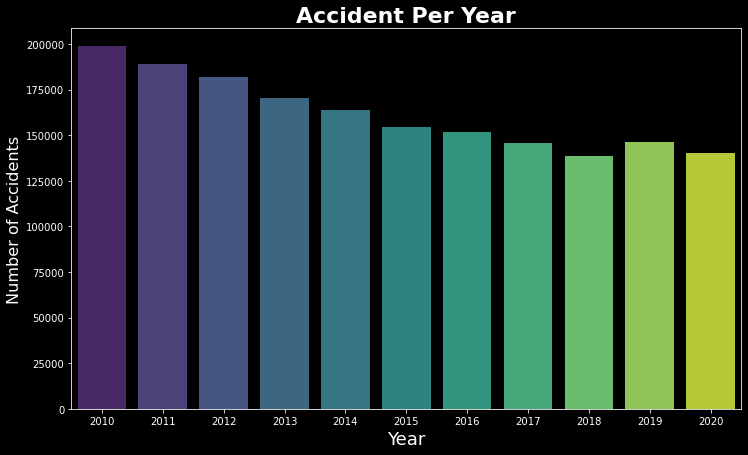

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(12,7))
sns.barplot(AccidentsPerYear.index,AccidentsPerYear.values,palette="viridis")
plt.title("Accident Per Year",fontsize=22,fontweight="bold")
plt.xlabel("Year",fontsize=18)
plt.ylabel("Number of Accidents",fontsize=16)
plt.show()

# --------------------------------------------------------------------------------------------------

In [22]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [23]:
AccidentPerDayOfWeek=accidents.groupby(["Day_of_Week"])["index"].count().reindex(cats)
AccidentPerDayOfWeek

Day_of_Week
Monday       253235
Tuesday      266661
Wednesday    268334
Thursday     267437
Friday       291307
Saturday     238064
Sunday       195294
Name: index, dtype: int64

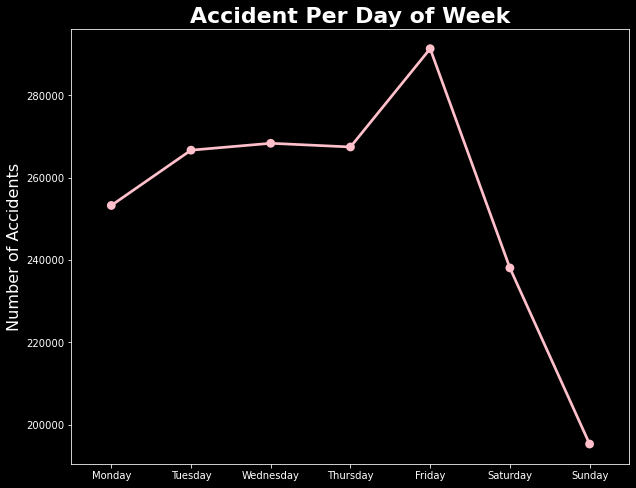

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
sns.pointplot(AccidentPerDayOfWeek.index,AccidentPerDayOfWeek.values,color="pink",linewidth=4,markers='o', markersize=4)
plt.title("Accident Per Day of Week",fontsize=22,fontweight="bold")
plt.xlabel("")
plt.ylabel("Number of Accidents",fontsize=16)
plt.show()

## -----------------------------------------------------------------------------------------------------------------------------

In [25]:
accidents["Urban_or_Rural_Area"].value_counts()

Urban    1146322
Rural     633974
Other         36
Name: Urban_or_Rural_Area, dtype: int64

Percentage of accidents occur in urban areas is 64%
Percentage of accidents occur in rural areas is 36%
Percentage of accidents occur in other areas is 0%


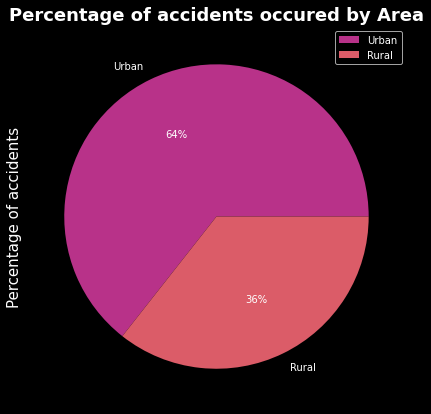

In [26]:
UrbanArea=len(accidents[accidents["Urban_or_Rural_Area"]=="Urban"])
RuralArea=len(accidents[accidents["Urban_or_Rural_Area"]=="Rural"])
OtherArea=len(accidents[accidents["Urban_or_Rural_Area"]=="Other"])
SumOfArea=UrbanArea+RuralArea+OtherArea
PerUrban=UrbanArea*1.0/SumOfArea*1.0*100

PerRural=RuralArea*1.0/SumOfArea*1.0*100

PerOther=OtherArea*1.0/SumOfArea*1.0*100

print("Percentage of accidents occur in urban areas is {0:.0f}%".format(PerUrban))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(PerRural))
print("Percentage of accidents occur in other areas is {0:.0f}%".format(PerOther))
labels = ['Urban', 'Rural']
y = [PerUrban, PerRural]
plt.figure(figsize=(12,7))
colors = sns.color_palette('plasma')[2:4]
plt.pie(y, labels = labels, colors = colors, autopct='%.0f%%')
plt.ylabel('Percentage of accidents',fontsize=15)
plt.title("Percentage of accidents occured by Area",fontsize=18,fontweight="bold")
plt.legend()
plt.show()

## ------------------------------------------------------------------------------------------------------------------------------

In [27]:
extreme_serious_accident=accidents[(accidents['Accident_Severity']=="extremely serious")]
serious_accident=accidents[(accidents['Accident_Severity']=="serious")]
unserious_accident=accidents[(accidents['Accident_Severity']=="unserious")]

In [28]:
print("Not Serious Group Shape:", unserious_accident.shape)
print("Serious Group Shape:", serious_accident.shape)
print("Extreme Serious Group Shape:", extreme_serious_accident.shape)

Not Serious Group Shape: (1515306, 30)
Serious Group Shape: (242030, 30)
Extreme Serious Group Shape: (22996, 30)


In [29]:
#setups for adding frequencies to visualizations
dftotal= float(len(accidents))
nstotal= float(len(unserious_accident))
setotal= float(len(serious_accident))
esetotal=float(len(extreme_serious_accident))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


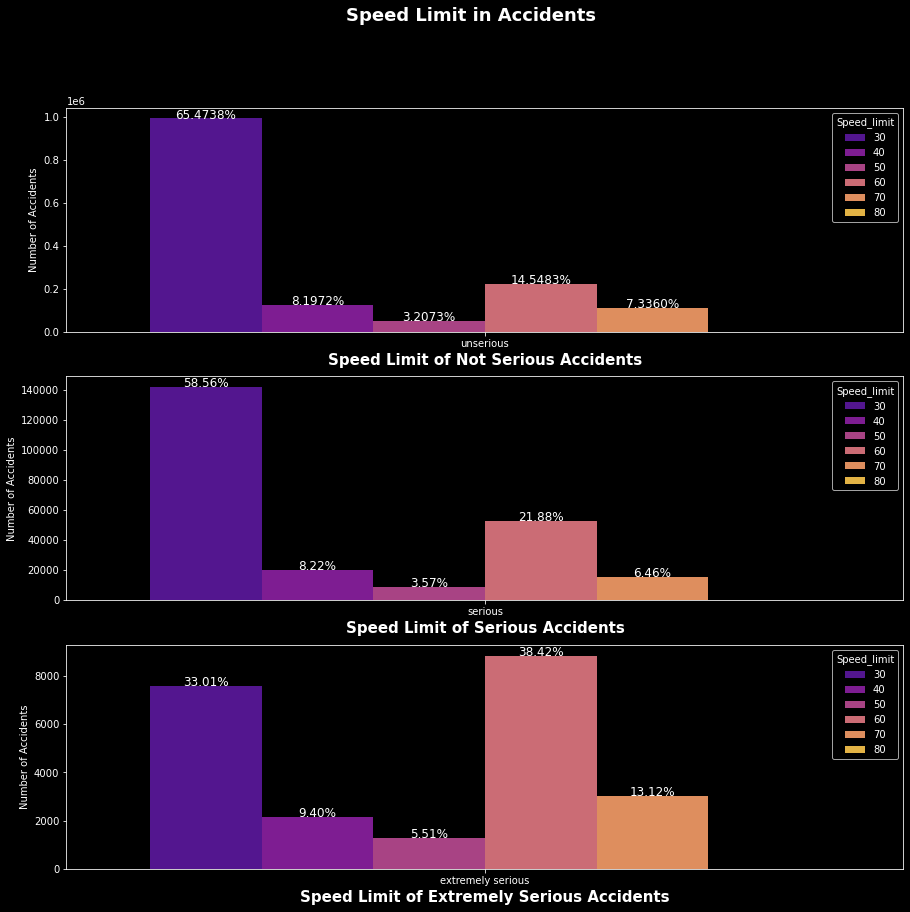

In [30]:
splt_order=[30,40,50,60,70,80]
splt_order2=[30,40,50,60,70,80]
splt_order3=[30,40,50,60,70,80]
fig, ax =plt.subplots(nrows=3, ncols=1,figsize = (15,14))

ax1 =sns.countplot("Accident_Severity", hue="Speed_limit", hue_order=splt_order,
              palette="plasma", data=unserious_accident, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("Accident_Severity", hue="Speed_limit", hue_order=splt_order2,
              palette="plasma", data=serious_accident, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
ax3 =  sns.countplot("Accident_Severity", hue="Speed_limit", hue_order=splt_order3,
              palette="plasma", data=extreme_serious_accident, ax=ax[2])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/esetotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax3.set_xlabel('Speed Limit of Extremely Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel("Number of Accidents",fontsize=10)
ax2.set_ylabel("Number of Accidents",fontsize=10)
ax3.set_ylabel("Number of Accidents",fontsize=10)
fig.show()
plt.savefig('Speed Limit in Accidents.png')

In [31]:
accidents["Speed_limit"].unique()


array([30, 40, 50, 20, 60, 70, 10, 15,  0], dtype=int64)

## ---------------------------------------------------------------------------------------------------------------------------------

In [32]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780332 entries, 200501BS00001 to 2015984141415
Data columns (total 30 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 int64  
 3   Accident_Severity                            object 
 4   Number_of_Vehicles                           int64  
 5   Number_of_Casualties                         int64  
 6   Date                                         object 
 7   Day_of_Week                                  object 
 8   Time                                         object 
 9   Local_Authority_(District)                   int64  
 10  Local_Authority_(Highway)                    object 
 11  1st_Road_Class                               int64  
 12  1st_Road_Number                              int64  
 13 

In [33]:
accidents["Time"].dtype

dtype('O')

In [34]:
accidents["Time"]

Accident_Index
200501BS00001    17:42
200501BS00002    17:36
200501BS00003    00:15
200501BS00004    10:35
200501BS00005    21:13
                 ...  
2015984139115    13:24
2015984139715    13:50
2015984140215    00:01
2015984140515    12:40
2015984141415    16:37
Name: Time, Length: 1780332, dtype: object

In [35]:
pd.to_datetime(accidents['Time'], format='%H:%M').dt.hour

Accident_Index
200501BS00001    17
200501BS00002    17
200501BS00003     0
200501BS00004    10
200501BS00005    21
                 ..
2015984139115    13
2015984139715    13
2015984140215     0
2015984140515    12
2015984141415    16
Name: Time, Length: 1780332, dtype: int64

In [36]:
accidents['Hour']=pd.to_datetime(accidents['Time'], format='%H:%M').dt.hour

In [37]:
accidents['Hour']

Accident_Index
200501BS00001    17
200501BS00002    17
200501BS00003     0
200501BS00004    10
200501BS00005    21
                 ..
2015984139115    13
2015984139715    13
2015984140215     0
2015984140515    12
2015984141415    16
Name: Hour, Length: 1780332, dtype: int64

In [38]:
accidents[(accidents['Hour']>=4) & (accidents['Hour']<10)]

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,index,Year,Hour
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00016,-0.157753,51.492622,1,unserious,2,1,2010-01-18,Tuesday,05:01,12,...,Darkness - lights lit,Raining no high winds,Bulldust,0,0,Urban,1,14,2010,5
200501BS00020,-0.171887,51.495811,1,unserious,2,1,2010-01-21,Friday,09:15,12,...,Daylight,Fine no high winds,Boggy,0,0,Urban,1,18,2010,9
200501BS00029,-0.166322,51.498062,1,unserious,2,1,2010-01-29,Saturday,07:34,12,...,Daylight,Fine no high winds,Bulldust,0,0,Urban,1,25,2010,7
200501BS70002,-0.160606,51.496893,1,unserious,2,1,2010-02-02,Wednesday,07:25,12,...,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1,30,2010,7
200501BS70005,-0.168234,51.497103,1,unserious,2,1,2010-12-02,Saturday,09:55,12,...,Daylight,Fine no high winds,Bulldust,0,0,Urban,1,33,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015984128215,-3.128065,55.025147,98,extremely serious,1,2,2020-08-30,Sunday,06:00,917,...,Daylight,Fine no high winds,Boggy,0,0,Rural,1,1780309,2020,6
2015984129115,-3.422724,55.276010,98,unserious,2,1,2020-09-09,Wednesday,04:44,917,...,Darkness - no lighting,Fine no high winds,Boggy,0,0,Rural,1,1780311,2020,4
2015984131215,-3.114769,54.992477,98,unserious,1,1,2020-09-27,Sunday,06:00,917,...,Darkness - no lighting,Fine no high winds,Boggy,0,0,Rural,1,1780315,2020,6


In [39]:
accidents["Hour"][(accidents['Hour']>=0) & (accidents['Hour']<=4)]=0
accidents["Hour"][(accidents['Hour']>=5) & (accidents['Hour']<8)]=1
accidents["Hour"][(accidents['Hour']>=8) & (accidents['Hour'] <=11)]=2
accidents["Hour"][(accidents['Hour']>=12) & (accidents['Hour'] <=15)]=3
accidents["Hour"][(accidents['Hour']>=16) & (accidents['Hour'] <=18)]=4
accidents["Hour"][(accidents['Hour']>=19) & (accidents['Hour'] <=21)]=5
accidents["Hour"][(accidents['Hour']>=21) & (accidents['Hour'] <=23)]=6

In [40]:
accidents["Hour"].value_counts()

3    458438
4    425880
2    391201
5    214010
1    120158
0     85812
6     84833
Name: Hour, dtype: int64

In [41]:
timeofdaygroups = {
                   0:"Late Night",
                   1: "Morning Rush",
                   2: "Day",
                   3: "Afternoon",
                   4: "After Work Rush",
                   5: "Evening",
                   6: "Night"}
accidents['Hour']=accidents['Hour'].map(timeofdaygroups)

In [42]:
indexDay=["Late Night","Morning Rush","Day","Afternoon","After Work Rush","Evening","Night"]

In [43]:
accidentsPerHour=accidents.groupby(by=["Hour"])["index"].count().reindex(indexDay)

In [44]:
accidentsPerHour

Hour
Late Night          85812
Morning Rush       120158
Day                391201
Afternoon          458438
After Work Rush    425880
Evening            214010
Night               84833
Name: index, dtype: int64

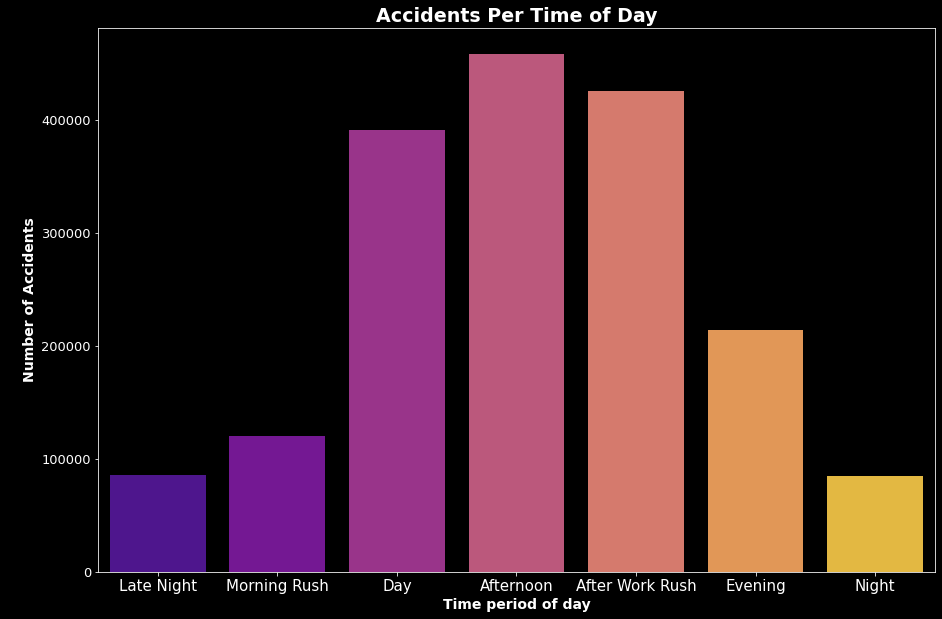

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.barplot(accidentsPerHour.index,accidentsPerHour.values, order=indexDay, palette='plasma')
plt.title("Accidents Per Time of Day",fontsize=19,fontweight="bold")
plt.xlabel("Time period of day", fontsize=14, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=14, fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.show()

## Age of people involved in the accidents

In [46]:
casualties.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
casualties['Index']=casualties['Index'].astype('int')+1
casualties['Index']

Accident_Index
200501BS00001          1
200501BS00002          2
200501BS00003          3
200501BS00004          4
200501BS00005          5
                  ...   
2014984137714    2216716
2014984138414    2216717
2014984138414    2216718
2014984139614    2216719
2014984139614    2216720
Name: Index, Length: 2216720, dtype: int32

In [47]:
casualties["Age_Band_of_Casualty"]=0
casualties["Age_Band_of_Casualty"]

Accident_Index
200501BS00001    0
200501BS00002    0
200501BS00003    0
200501BS00004    0
200501BS00005    0
                ..
2014984137714    0
2014984138414    0
2014984138414    0
2014984139614    0
2014984139614    0
Name: Age_Band_of_Casualty, Length: 2216720, dtype: int64

In [48]:

casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>0) & (casualties['Age_of_Casualty']<=5)]=1
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=6) & (casualties['Age_of_Casualty']<=10)]=2
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=11) & (casualties['Age_of_Casualty']<=15)]=3
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=16) & (casualties['Age_of_Casualty']<=20)]=4
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=21) & (casualties['Age_of_Casualty']<=25)]=5
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=26) & (casualties['Age_of_Casualty']<=35)]=6
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=36) & (casualties['Age_of_Casualty']<=45)]=7
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=46) & (casualties['Age_of_Casualty']<=55)]=8
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=56) & (casualties['Age_of_Casualty']<=65)]=9
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>=66) & (casualties['Age_of_Casualty']<=75)]=10
casualties["Age_Band_of_Casualty"][(casualties['Age_of_Casualty']>75) ]=11

In [49]:
casualties

,Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Age_Band_of_Casualty
Accident_Index,,,,,,,,,,,,,
200501BS00001,1,1,1,died,Male,37,2,1,1,-1,0,1,7
200501BS00002,2,1,1,extreme wounded,Male,37,3,0,0,-1,11,1,7
200501BS00003,3,2,1,wounded,Male,62,3,0,0,-1,9,1,9
200501BS00004,4,1,1,died,Male,30,3,5,2,-1,0,1,6
200501BS00005,5,1,1,wounded,Male,49,3,0,0,-1,3,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014984137714,2216716,1,1,extreme wounded,Female,16,3,0,0,0,9,1,4
2014984138414,2216717,1,1,wounded,Male,27,3,0,0,0,9,1,6
2014984138414,2216718,2,2,wounded,Male,44,2,0,0,0,19,1,7


In [50]:
casualties['Age_Band_of_Casualty'].value_counts()

6     462524
7     359439
4     325582
5     281143
8     260983
9     158218
3     105167
10     87441
11     72506
2      63913
1      38016
0       1788
Name: Age_Band_of_Casualty, dtype: int64

In [51]:

Object = {
          1:"0-5",
          2:"6-10",
          3:"11-15",
          4:"16-20",
          5:"21-25",
          6:"26-35",
          7:"36-45", 
          8:"46-55",
          9:"56-65",
          10:"66-75",
          11:"75+"}
casualties['Age_Band_of_Casualty']=casualties['Age_Band_of_Casualty'].map(Object)

In [52]:
AgeBand = ["0-5","6-10","11-15","16-20","21-25","26-35",
           "36-45", "46-55","56-65","66-75","75+"]

In [53]:
Age_Band=casualties.groupby(by=["Age_Band_of_Casualty"])["Index"].count().reindex(AgeBand)
Age_Band

Age_Band_of_Casualty
0-5       38016
6-10      63913
11-15    105167
16-20    325582
21-25    281143
26-35    462524
36-45    359439
46-55    260983
56-65    158218
66-75     87441
75+       72506
Name: Index, dtype: int64

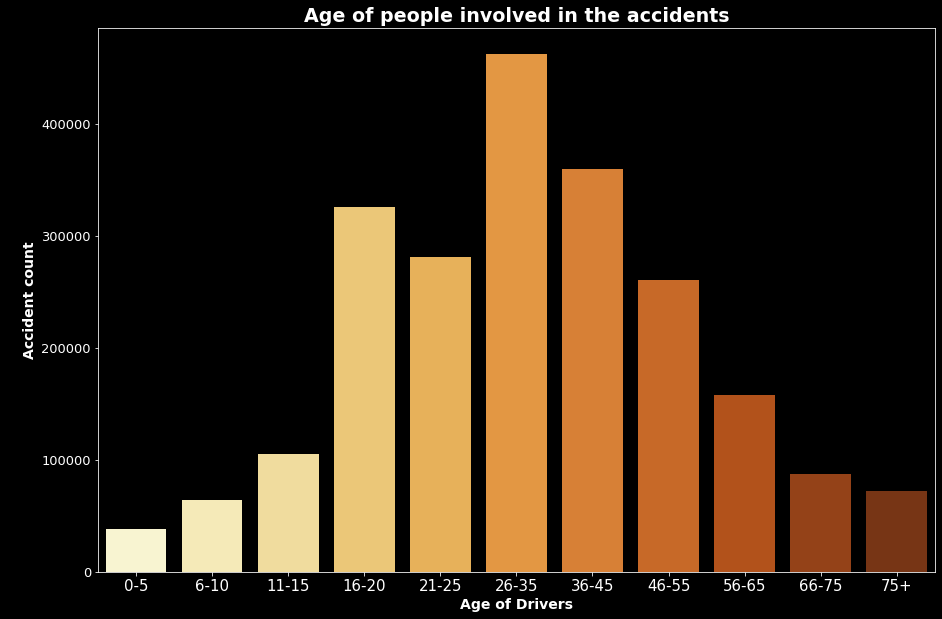

In [54]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))
sns.barplot(Age_Band.index,Age_Band.values, order=AgeBand, palette='YlOrBr')
plt.title("Age of people involved in the accidents",fontsize=19,fontweight="bold")
plt.xlabel("Age of Drivers", fontsize=14, fontweight="bold")
plt.ylabel("\nAccident count", fontsize=14, fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.savefig('Age of people involved in the accidents.png')
plt.show()


## ----------------------------------------------------------------------------------------------------------------------------------

# Prediction

In [55]:
accidents.head(3)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,index,Year,Hour
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1,serious,1,1,2010-04-01,Tuesday,17:42,12,...,Daylight,Raining no high winds,Bulldust,0,0,Urban,1,1,2010,After Work Rush
200501BS00002,-0.211708,51.520075,1,unserious,1,1,2010-05-01,Wednesday,17:36,12,...,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1,2,2010,After Work Rush
200501BS00003,-0.206458,51.525301,1,unserious,2,1,2010-06-01,Thursday,00:15,12,...,Darkness - lights lit,Fine no high winds,Boggy,0,0,Urban,1,3,2010,Late Night


In [56]:
df_ML=accidents.join(vehicles, how='outer')
df=df_ML

In [57]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df)

In [58]:
for col in df.columns:
    if(df.dtypes[col]!='O'):
        mean=df[col].mean(skipna=True)
        df[col]=df[col].mask(df[col] == -1,round(mean))

In [59]:

cT = ChiSquare(df_ML)
testColumns = ['Longitude', 'Latitude', 'Police_Force',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Hour', 'Unnamed: 0', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type']
for col in testColumns:
    cT.TestIndependence(colX=col,colY="Accident_Severity",alpha=0.02)


The column Longitude is IMPORTANT for Prediction
The column Latitude is IMPORTANT for Prediction
The column Police_Force is IMPORTANT for Prediction
The column Number_of_Vehicles is IMPORTANT for Prediction
The column Number_of_Casualties is IMPORTANT for Prediction
The column Date is IMPORTANT for Prediction
The column Day_of_Week is IMPORTANT for Prediction
The column Time is IMPORTANT for Prediction
The column Local_Authority_(District) is IMPORTANT for Prediction
The column Local_Authority_(Highway) is IMPORTANT for Prediction
The column 1st_Road_Class is IMPORTANT for Prediction
The column 1st_Road_Number is IMPORTANT for Prediction
The column Road_Type is IMPORTANT for Prediction
The column Speed_limit is IMPORTANT for Prediction
The column Junction_Detail is IMPORTANT for Prediction
The column Junction_Control is IMPORTANT for Prediction
The column 2nd_Road_Class is IMPORTANT for Prediction
The column 2nd_Road_Number is IMPORTANT for Prediction
The column Pedestrian_Crossing-Hum

In [60]:
df.dropna(inplace=True)

In [61]:
df

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1.0,serious,1.0,1.0,2010-04-01,Tuesday,17:42,12.0,...,1.0,y,15.0,Female,74.0,1412.0,1.0,5.0,7.0,1.0
200501BS00002,-0.211708,51.520075,1.0,unserious,1.0,1.0,2010-05-01,Wednesday,17:36,12.0,...,4.0,y,1.0,Male,42.0,8268.0,2.0,3.0,4.0,1.0
200501BS00003,-0.206458,51.525301,1.0,unserious,2.0,1.0,2010-06-01,Thursday,00:15,12.0,...,4.0,y,1.0,Male,35.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,-0.206458,51.525301,1.0,unserious,2.0,1.0,2010-06-01,Thursday,00:15,12.0,...,3.0,y,15.0,Male,62.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,-0.173862,51.482442,1.0,unserious,1.0,1.0,2010-07-01,Friday,10:35,12.0,...,1.0,y,15.0,Female,49.0,1769.0,1.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014984138414,-3.191397,54.990446,98.0,serious,3.0,2.0,2019-12-17,Wednesday,06:55,917.0,...,3.0,y,2.0,Male,27.0,1781.0,1.0,12.0,6.0,1.0
2014984138414,-3.191397,54.990446,98.0,serious,3.0,2.0,2019-12-17,Wednesday,06:55,917.0,...,1.0,y,2.0,Male,44.0,1686.0,2.0,4.0,1.0,1.0
2014984138414,-3.191397,54.990446,98.0,serious,3.0,2.0,2019-12-17,Wednesday,06:55,917.0,...,3.0,y,6.0,Male,73.0,2143.0,2.0,5.0,8.0,3.0


In [62]:
df.isnull().sum()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

In [63]:
df.shape

(3003964, 52)

In [64]:
df["Sex_of_Driver"].value_counts()

Male         1977857
Female        852383
Not known     173691
-1                33
Name: Sex_of_Driver, dtype: int64

In [65]:
df.drop(columns=["Date","Time"],inplace=True)

In [66]:
for col in df.columns:
    if(df.dtypes[col]!='O'):
        mean=df[col].mean(skipna=True)
        df[col].replace(-1,round(mean),inplace=True)

In [67]:
df=df[df!='-1'].dropna()

In [68]:
df["Sex_of_Driver"].unique()

array(['Female', 'Male', 'Not known'], dtype=object)

In [69]:
df[df["Sex_of_Driver"]=='-1']

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980888 entries, 200501BS00001 to 2014984139614
Data columns (total 50 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 float64
 3   Accident_Severity                            object 
 4   Number_of_Vehicles                           float64
 5   Number_of_Casualties                         float64
 6   Day_of_Week                                  object 
 7   Local_Authority_(District)                   float64
 8   Local_Authority_(Highway)                    object 
 9   1st_Road_Class                               float64
 10  1st_Road_Number                              float64
 11  Road_Type                                    object 
 12  Speed_limit                                  float64
 13 

In [71]:
df.drop(columns=["Hour","Year","Unnamed: 0","index"],inplace=True)

In [72]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Accident_Severity"] = ord_enc.fit_transform(df[["Accident_Severity"]])
df["Day_of_Week"] = ord_enc.fit_transform(df[["Day_of_Week"]])
df["Local_Authority_(Highway)"] = ord_enc.fit_transform(df[["Local_Authority_(Highway)"]])
df["Road_Type"] = ord_enc.fit_transform(df[["Road_Type"]])
df["Light_Conditions"] = ord_enc.fit_transform(df[["Light_Conditions"]])
df["Weather_Conditions"] = ord_enc.fit_transform(df[["Weather_Conditions"]])
df["Road_Surface_Conditions"] = ord_enc.fit_transform(df[["Road_Surface_Conditions"]])
df["Sex_of_Driver"] = ord_enc.fit_transform(df[["Sex_of_Driver"]])
df["Urban_or_Rural_Area"] = ord_enc.fit_transform(df[["Urban_or_Rural_Area"]])
df["Was_Vehicle_Left_Hand_Drive?"] = ord_enc.fit_transform(df[["Was_Vehicle_Left_Hand_Drive?"]])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980888 entries, 200501BS00001 to 2014984139614
Data columns (total 46 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 float64
 3   Accident_Severity                            float64
 4   Number_of_Vehicles                           float64
 5   Number_of_Casualties                         float64
 6   Day_of_Week                                  float64
 7   Local_Authority_(District)                   float64
 8   Local_Authority_(Highway)                    float64
 9   1st_Road_Class                               float64
 10  1st_Road_Number                              float64
 11  Road_Type                                    float64
 12  Speed_limit                                  float64
 13 

In [74]:
df.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehic

In [75]:
col=[
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Vehicle_Type',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_of_Vehicle',
 'Engine_Capacity_(CC)',
"Accident_Severity"]

In [76]:
df[col]

,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC),Accident_Severity
Accident_Index,,,,,,,,,,,,,,
200501BS00001,5.0,1.0,30.0,4.0,6.0,1.0,2.0,1.0,9.0,0.0,74.0,5.0,1412.0,1.0
200501BS00002,6.0,4.0,30.0,1.0,1.0,0.0,2.0,1.0,11.0,1.0,42.0,3.0,8268.0,2.0
200501BS00003,4.0,1.0,30.0,1.0,1.0,0.0,2.0,1.0,11.0,1.0,35.0,5.0,8300.0,2.0
200501BS00003,4.0,1.0,30.0,1.0,1.0,0.0,2.0,1.0,9.0,1.0,62.0,6.0,1762.0,2.0
200501BS00004,0.0,1.0,30.0,4.0,1.0,0.0,2.0,1.0,9.0,0.0,49.0,4.0,1769.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,9.0,1.0,27.0,12.0,1781.0,1.0
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,19.0,1.0,44.0,4.0,1686.0,1.0
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,9.0,1.0,73.0,5.0,2143.0,1.0


## Normalize dataset

In [77]:
df_ML=df[col]

In [78]:
df_ML

,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC),Accident_Severity
Accident_Index,,,,,,,,,,,,,,
200501BS00001,5.0,1.0,30.0,4.0,6.0,1.0,2.0,1.0,9.0,0.0,74.0,5.0,1412.0,1.0
200501BS00002,6.0,4.0,30.0,1.0,1.0,0.0,2.0,1.0,11.0,1.0,42.0,3.0,8268.0,2.0
200501BS00003,4.0,1.0,30.0,1.0,1.0,0.0,2.0,1.0,11.0,1.0,35.0,5.0,8300.0,2.0
200501BS00003,4.0,1.0,30.0,1.0,1.0,0.0,2.0,1.0,9.0,1.0,62.0,6.0,1762.0,2.0
200501BS00004,0.0,1.0,30.0,4.0,1.0,0.0,2.0,1.0,9.0,0.0,49.0,4.0,1769.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,9.0,1.0,27.0,12.0,1781.0,1.0
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,19.0,1.0,44.0,4.0,1686.0,1.0
2014984138414,6.0,1.0,60.0,3.0,6.0,1.0,1.0,1.0,9.0,1.0,73.0,5.0,2143.0,1.0


In [79]:
df_ML=df_ML.sample(n=500000)

In [80]:
for i in range(len(df_ML.columns)):
    missingdata=df_ML[df_ML.columns[i]].isna().sum()
    print("columns %d have missing data %d"%(i,missingdata))

columns 0 have missing data 0
columns 1 have missing data 0
columns 2 have missing data 0
columns 3 have missing data 0
columns 4 have missing data 0
columns 5 have missing data 0
columns 6 have missing data 0
columns 7 have missing data 0
columns 8 have missing data 0
columns 9 have missing data 0
columns 10 have missing data 0
columns 11 have missing data 0
columns 12 have missing data 0
columns 13 have missing data 0


In [81]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 201414A087814 to 2009170M11409
Data columns (total 14 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Day_of_Week                                  500000 non-null  float64
 1   Road_Type                                    500000 non-null  float64
 2   Speed_limit                                  500000 non-null  float64
 3   Light_Conditions                             500000 non-null  float64
 4   Weather_Conditions                           500000 non-null  float64
 5   Road_Surface_Conditions                      500000 non-null  float64
 6   Urban_or_Rural_Area                          500000 non-null  float64
 7   Did_Police_Officer_Attend_Scene_of_Accident  500000 non-null  float64
 8   Vehicle_Type                                 500000 non-null  float64
 9   Sex_of_Driver                                

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980888 entries, 200501BS00001 to 2014984139614
Data columns (total 46 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Longitude                                    float64
 1   Latitude                                     float64
 2   Police_Force                                 float64
 3   Accident_Severity                            float64
 4   Number_of_Vehicles                           float64
 5   Number_of_Casualties                         float64
 6   Day_of_Week                                  float64
 7   Local_Authority_(District)                   float64
 8   Local_Authority_(Highway)                    float64
 9   1st_Road_Class                               float64
 10  1st_Road_Number                              float64
 11  Road_Type                                    float64
 12  Speed_limit                                  float64
 13 

In [83]:
col=[
 'Day_of_Week',
 'Road_Type',
 'Speed_limit',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Vehicle_Type',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_of_Vehicle',
 'Engine_Capacity_(CC)',
"Accident_Severity"]

In [84]:
df=df_ML[col]

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 201414A087814 to 2009170M11409
Data columns (total 14 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Day_of_Week                                  500000 non-null  float64
 1   Road_Type                                    500000 non-null  float64
 2   Speed_limit                                  500000 non-null  float64
 3   Light_Conditions                             500000 non-null  float64
 4   Weather_Conditions                           500000 non-null  float64
 5   Road_Surface_Conditions                      500000 non-null  float64
 6   Urban_or_Rural_Area                          500000 non-null  float64
 7   Did_Police_Officer_Attend_Scene_of_Accident  500000 non-null  float64
 8   Vehicle_Type                                 500000 non-null  float64
 9   Sex_of_Driver                                

In [86]:
X=df.drop(columns=["Accident_Severity"])
y=df["Accident_Severity"]

In [87]:
X.head(3)

,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC)
Accident_Index,,,,,,,,,,,,,
201414A087814,0.0,4.0,70.0,4.0,1.0,0.0,1.0,1.0,9.0,1.0,46.0,2.0,2967.0
201406K087759,4.0,1.0,40.0,4.0,1.0,0.0,2.0,1.0,9.0,0.0,31.0,14.0,1332.0
2009219000213,1.0,1.0,60.0,4.0,1.0,3.0,1.0,1.0,9.0,1.0,71.0,1.0,1560.0


In [88]:
y.head(3)

Accident_Index
201414A087814    2.0
201406K087759    2.0
2009219000213    2.0
Name: Accident_Severity, dtype: float64

## Thuật toán tìm ra các trường tốt nhất để dự đoán

In [90]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 11 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k = 11)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['Day_of_Week', 'Road_Type', 'Speed_limit', 'Weather_Conditions',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Type', 'Sex_of_Driver', 'Age_of_Driver', 'Age_of_Vehicle',
       'Engine_Capacity_(CC)'],
      dtype='object')

In [91]:
col=['Road_Type', 'Speed_limit', 'Weather_Conditions',
       'Day_of_Week', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Type',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_of_Vehicle',
       'Engine_Capacity_(CC)']

In [92]:
X=X[col]
X

,Road_Type,Speed_limit,Weather_Conditions,Day_of_Week,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC)
Accident_Index,,,,,,,,,,,
201414A087814,4.0,70.0,1.0,0.0,1.0,1.0,9.0,1.0,46.0,2.0,2967.0
201406K087759,1.0,40.0,1.0,4.0,2.0,1.0,9.0,0.0,31.0,14.0,1332.0
2009219000213,1.0,60.0,1.0,1.0,1.0,1.0,9.0,1.0,71.0,1.0,1560.0
200601ZT80508,1.0,30.0,1.0,2.0,2.0,1.0,9.0,0.0,53.0,5.0,1412.0
200643W167036,1.0,30.0,1.0,3.0,2.0,1.0,9.0,1.0,21.0,5.0,1412.0
...,...,...,...,...,...,...,...,...,...,...,...
200701PL60371,1.0,30.0,1.0,0.0,2.0,1.0,9.0,1.0,34.0,9.0,1400.0
2005230591334,1.0,60.0,1.0,0.0,1.0,1.0,9.0,1.0,41.0,2.0,1595.0
2008130705708,1.0,30.0,1.0,0.0,2.0,2.0,11.0,0.0,51.0,1.0,9360.0


In [93]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
print(X)

[[0.8        1.         0.11111111 ... 0.45918367 0.00909091 0.02964119]
 [0.2        0.5        0.11111111 ... 0.30612245 0.11818182 0.01329053]
 [0.2        0.83333333 0.11111111 ... 0.71428571 0.         0.01557062]
 ...
 [0.2        0.33333333 0.11111111 ... 0.51020408 0.         0.09357374]
 [0.2        0.33333333 0.11111111 ... 0.39795918 0.03636364 0.01409056]
 [0.2        0.33333333 0.11111111 ... 0.54081633 0.         0.01385055]]


In [94]:
X

array([[0.8       , 1.        , 0.11111111, ..., 0.45918367, 0.00909091,
        0.02964119],
       [0.2       , 0.5       , 0.11111111, ..., 0.30612245, 0.11818182,
        0.01329053],
       [0.2       , 0.83333333, 0.11111111, ..., 0.71428571, 0.        ,
        0.01557062],
       ...,
       [0.2       , 0.33333333, 0.11111111, ..., 0.51020408, 0.        ,
        0.09357374],
       [0.2       , 0.33333333, 0.11111111, ..., 0.39795918, 0.03636364,
        0.01409056],
       [0.2       , 0.33333333, 0.11111111, ..., 0.54081633, 0.        ,
        0.01385055]])

In [95]:
X = pd.DataFrame(X, columns = [col])
X

,Road_Type,Speed_limit,Weather_Conditions,Day_of_Week,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Engine_Capacity_(CC)
0,0.8,1.000000,0.111111,0.000000,0.5,0.0,0.082474,0.5,0.459184,0.009091,0.029641
1,0.2,0.500000,0.111111,0.666667,1.0,0.0,0.082474,0.0,0.306122,0.118182,0.013291
2,0.2,0.833333,0.111111,0.166667,0.5,0.0,0.082474,0.5,0.714286,0.000000,0.015571
3,0.2,0.333333,0.111111,0.333333,1.0,0.0,0.082474,0.0,0.530612,0.036364,0.014091
4,0.2,0.333333,0.111111,0.500000,1.0,0.0,0.082474,0.5,0.204082,0.036364,0.014091
...,...,...,...,...,...,...,...,...,...,...,...
499995,0.2,0.333333,0.111111,0.000000,1.0,0.0,0.082474,0.5,0.336735,0.072727,0.013971
499996,0.2,0.833333,0.111111,0.000000,0.5,0.0,0.082474,0.5,0.408163,0.009091,0.015921
499997,0.2,0.333333,0.111111,0.000000,1.0,0.5,0.103093,0.0,0.510204,0.000000,0.093574
499998,0.2,0.333333,0.111111,0.166667,1.0,0.0,0.000000,0.5,0.397959,0.036364,0.014091


## Spliting the data into training data and test data

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=99)

In [97]:
X_train.shape

(400000, 11)

In [98]:
X_test.shape

(100000, 11)

In [99]:
y_train.shape

(400000,)

In [100]:
y_test.shape

(100000,)

## Random Forest

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)


In [102]:
pd.DataFrame({"y":y_test,"y_predict":Y_pred}).head(5)

,y,y_predict
Accident_Index,,
200714A093407,2.0,2.0
201201XD80975,2.0,2.0
2010210003697,2.0,2.0
201020S017650,0.0,2.0
2009130904609,2.0,2.0


## Evaluating model

In [103]:
y_test

Accident_Index
200714A093407    2.0
201201XD80975    2.0
2010210003697    2.0
201020S017650    0.0
2009130904609    2.0
                ... 
201301MM70620    2.0
2013450008092    2.0
2009160C06510    2.0
200501KD50157    2.0
200614G039406    1.0
Name: Accident_Severity, Length: 100000, dtype: float64

In [104]:
Y_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [105]:
# Display accuracy score
accuracy_score(y_test, Y_pred,normalize=False)

84876

In [106]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)


Accuracy 84.88
              precision    recall  f1-score   support

         0.0   0.053030  0.005542  0.010036      1263
         1.0   0.241821  0.058104  0.093695     12340
         2.0   0.868415  0.974015  0.918189     86397

    accuracy                       0.848760    100000
   macro avg   0.387755  0.345887  0.340640    100000
weighted avg   0.780795  0.848760  0.804976    100000



## Các thuộc tính ảnh hưởng mạnh đến dự đoán

<AxesSubplot:>

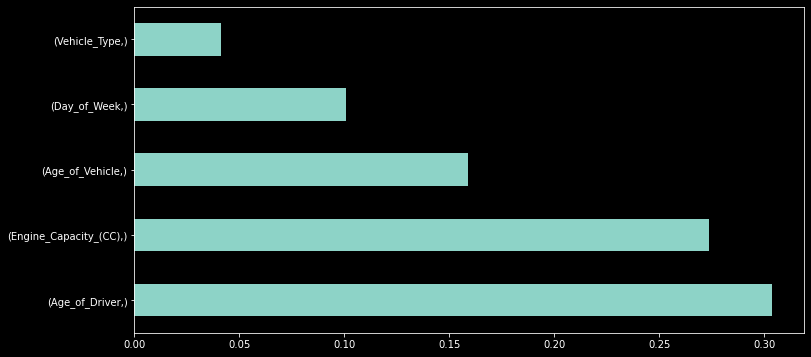

In [107]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')

## Logistic Regression


In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


## Evaluating Model

In [109]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)

Accuracy 86.4
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000      1263
         1.0   0.000000  0.000000  0.000000     12340
         2.0   0.863969  0.999988  0.927016     86397

    accuracy                       0.863960    100000
   macro avg   0.287990  0.333329  0.309005    100000
weighted avg   0.746443  0.863960  0.800914    100000



## Decision Tree 

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

## Evaluating Model

In [111]:
acc_decision_tree1 = round(accuracy_score(y_pred2, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
    y_pred=y_pred2)
print("Accuracy", acc_decision_tree1)
print(sk_report)

Accuracy 76.67
              precision    recall  f1-score   support

         0.0   0.034623  0.040380  0.037281      1263
         1.0   0.157931  0.166288  0.162002     12340
         2.0   0.871805  0.863097  0.867429     86397

    accuracy                       0.766720    100000
   macro avg   0.354787  0.356589  0.355571    100000
weighted avg   0.773140  0.766720  0.769895    100000



In [112]:
pd.DataFrame(y_pred2).value_counts()

2.0    85534
1.0    12993
0.0     1473
dtype: int64

In [113]:
y_test.value_counts()

2.0    86397
1.0    12340
0.0     1263
Name: Accident_Severity, dtype: int64

## Hyperparameter


In [114]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [4,5,6,8] # maximum number of levels allowed in each decision tree
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'bootstrap': bootstrap}

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [116]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [117]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [118]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 5, 6, 8], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}  



In [119]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=8,bootstrap=True)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)


In [120]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)

Accuracy 86.4
              precision    recall  f1-score   support

         0.0   0.000000  0.000000  0.000000      1263
         1.0   0.416667  0.000405  0.000810     12340
         2.0   0.864014  0.999931  0.927017     86397

    accuracy                       0.863960    100000
   macro avg   0.426893  0.333445  0.309275    100000
weighted avg   0.797899  0.863960  0.801014    100000

